Random Forest Classifier using OOB dataset

In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Admin/anaconda3/Library/bin/graphviz'

os.path.dirname(os.path.realpath('Social_network_Ads.csv'))

'C:\\Users\\Admin\\Documents\\Python Practise\\Random-Forest-Classifier'

# Importing the Dataset

Social network ads

In [47]:
data=pd.read_csv("C:\\Users\\Admin\\Documents\\Python Practise\\Random-Forest-Classifier\Social_network_Ads.csv")
print(data.shape)
print(data.head)

(400, 5)
<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>


# Allocating the features and label

Dropping the categorical Gender as it cannot be scaled

In [48]:
data = data.drop(['Gender'],axis=1)


In [49]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [50]:
data.info

<bound method DataFrame.info of       User ID  Age  EstimatedSalary  Purchased
0    15624510   19            19000          0
1    15810944   35            20000          0
2    15668575   26            43000          0
3    15603246   27            57000          0
4    15804002   19            76000          0
..        ...  ...              ...        ...
395  15691863   46            41000          1
396  15706071   51            23000          1
397  15654296   50            20000          1
398  15755018   36            33000          0
399  15594041   49            36000          1

[400 rows x 4 columns]>

Splitting the dataset into train and test

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=5)

# Displaying first three feature label rows

In [53]:
X_train.shape

(280, 3)

In [54]:
X_test[:3]

array([[15666675,       46,    96000],
       [15662067,       19,    26000],
       [15591433,       36,    52000]], dtype=int64)

# First three target values

In [55]:
y_test[:3]

array([0, 0, 0], dtype=int64)

# Feature Scaling the data

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [57]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Printing the scaled values of X_train and X_test

In [60]:
print(X_test[0:3])


[[-0.37292327  0.81426197  0.70457812]
 [-0.43895023 -1.70551719 -1.31055849]
 [-1.45104844 -0.11898957 -0.56207918]]


# Training the Random Forest Classifier on the train data

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier = RandomForestClassifier(n_estimators = 5,criterion="entropy", random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

# Predicting a new result

In [64]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

# Accuracy of the result

In [66]:
print("the accuracy score is", accuracy_score(y_test,y_pred))

the accuracy score is 0.9166666666666666


# making the confusion matrix

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("the accuracy score is", accuracy_score(y_test,y_pred))

[[71  7]
 [ 3 39]]
the accuracy score is 0.9166666666666666


# Visualizing the training set results

In [80]:
from sklearn.tree import export_graphviz
import graphviz
import PIL
import pydotplus
from glob import glob
from IPython.display import display, Image

In [89]:
def show_tree_as_png(classifier,iteration,feature_name, target_name):
        file_name="RandomForest" + str(iteration) + ".png"
        dot_data=export_graphviz(
            classifier,
            out_file=None,
            feature_names=feature_names,
            class_names = target_name,
            rounded = True,
            proportion = False,
            precision = 2,
            filled=True
           )
        graph = pydotplus.graph_from_dot_data(dot_data)
        graph.write_png(file_name)
        print("Decision Tree {} saved as png file".format(iteration + 1))

In [112]:
col = data.columns.to_list()
feature_names = col[:3]
target_names = col[3]

['User ID', 'Age', 'EstimatedSalary', 'Purchased']

In [104]:
target_names

'Purchased'

In [105]:
feature_names

['User ID', 'Age', 'EstimatedSalary']

In [106]:
classifier.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=209652396),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=398764591),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=924231285),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1478610112),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=441365315)]

In [107]:
classifier.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=209652396)

In [108]:
for i in range(len(classifier.estimators_)):
    show_tree_as_png(classifier.estimators_[i], i, feature_names, target_names)

Decision Tree 1 saved as png file
Decision Tree 2 saved as png file
Decision Tree 3 saved as png file
Decision Tree 4 saved as png file
Decision Tree 5 saved as png file


In [109]:
images = [PIL.Image.open(f) for f in glob('./*.png')]

In [110]:
images

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2132x1847 at 0x27EE299E910>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2815x1371 at 0x27EE35ABAF0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=3529x1529 at 0x27EE35D0CD0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1771x1212 at 0x27EE35D0E20>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=2008x2005 at 0x27EE35D0D60>]

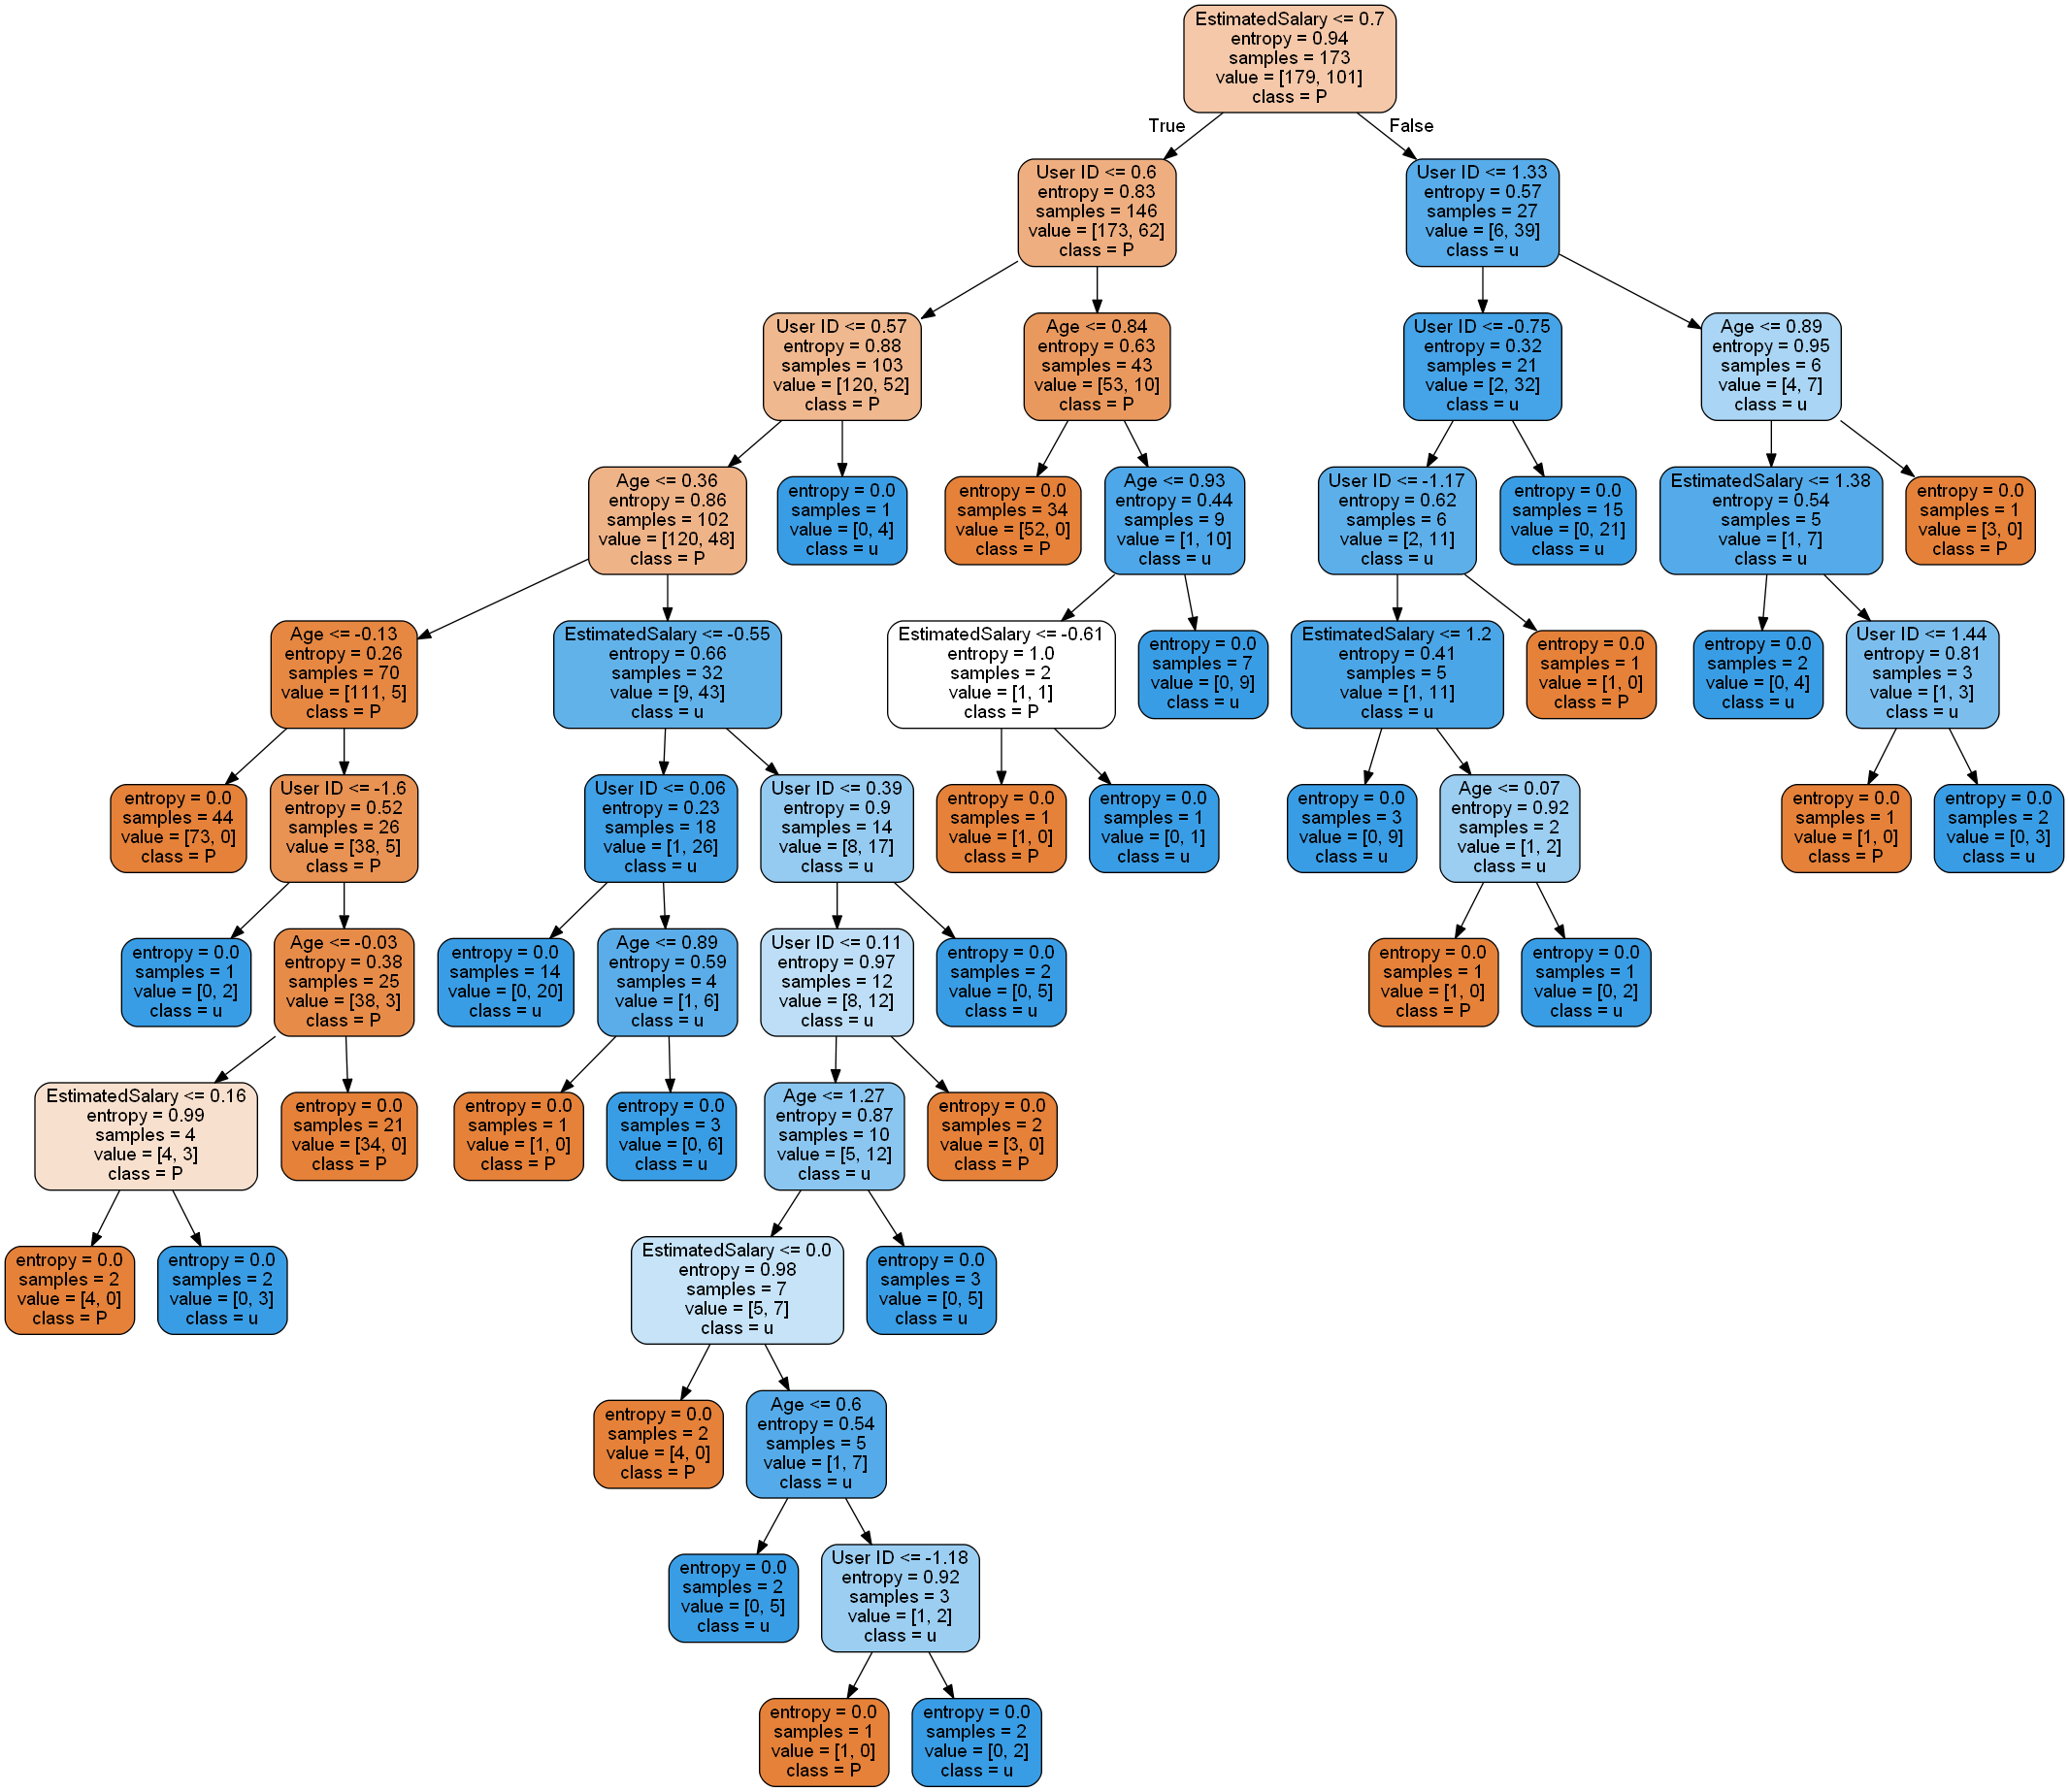

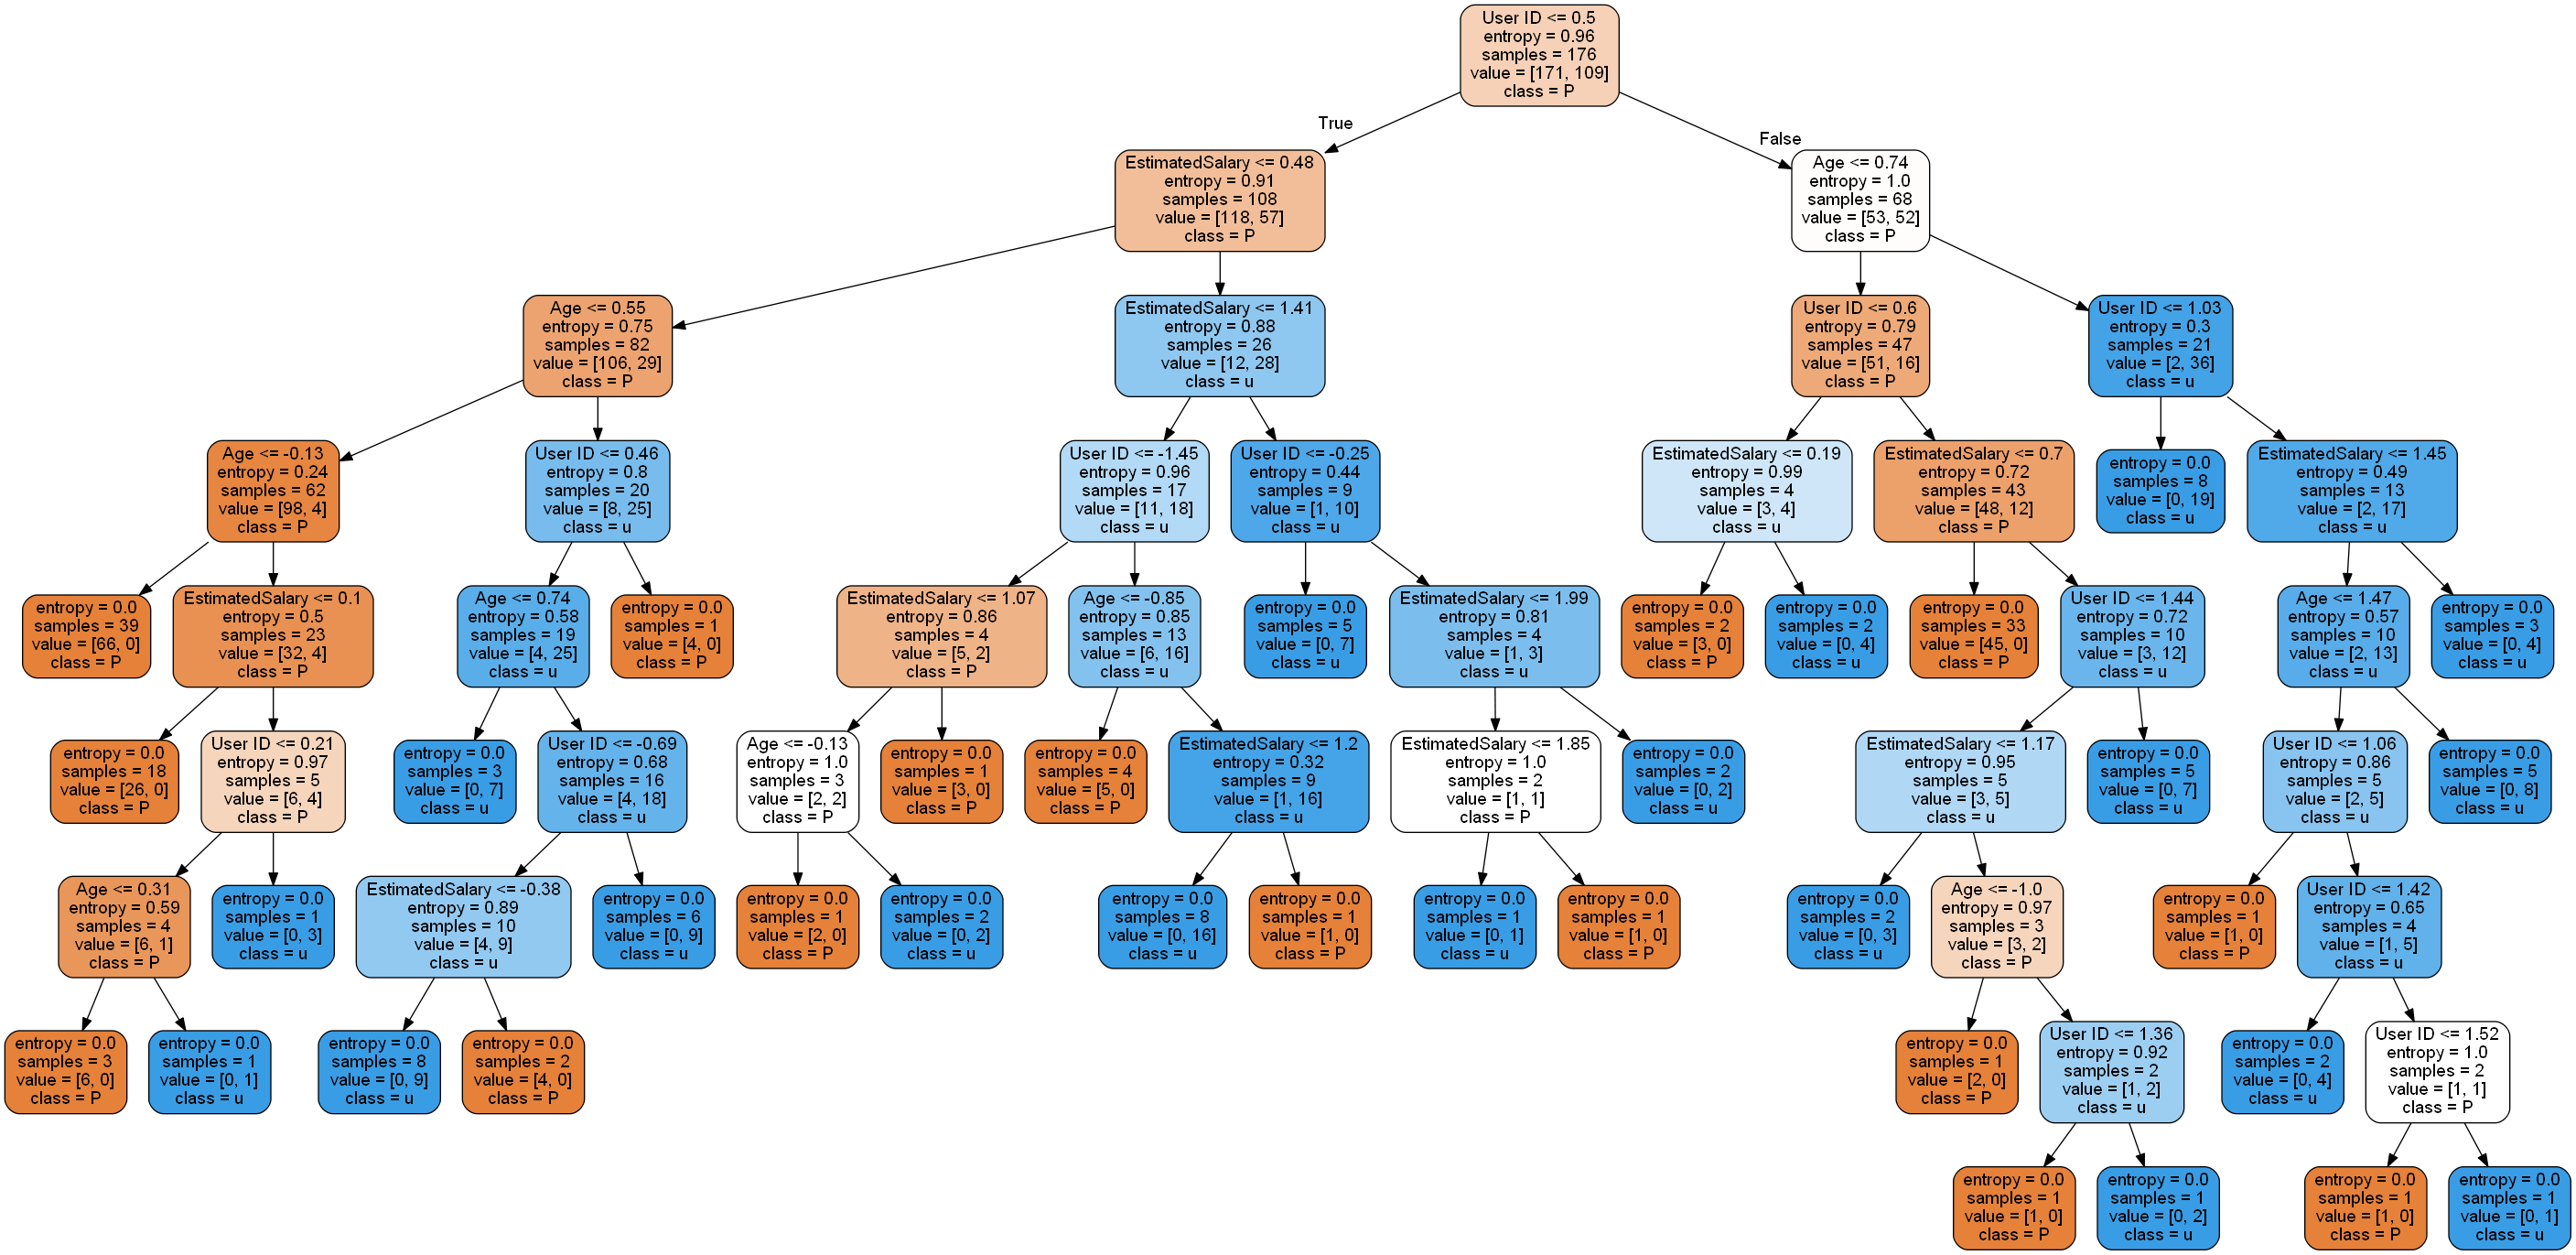

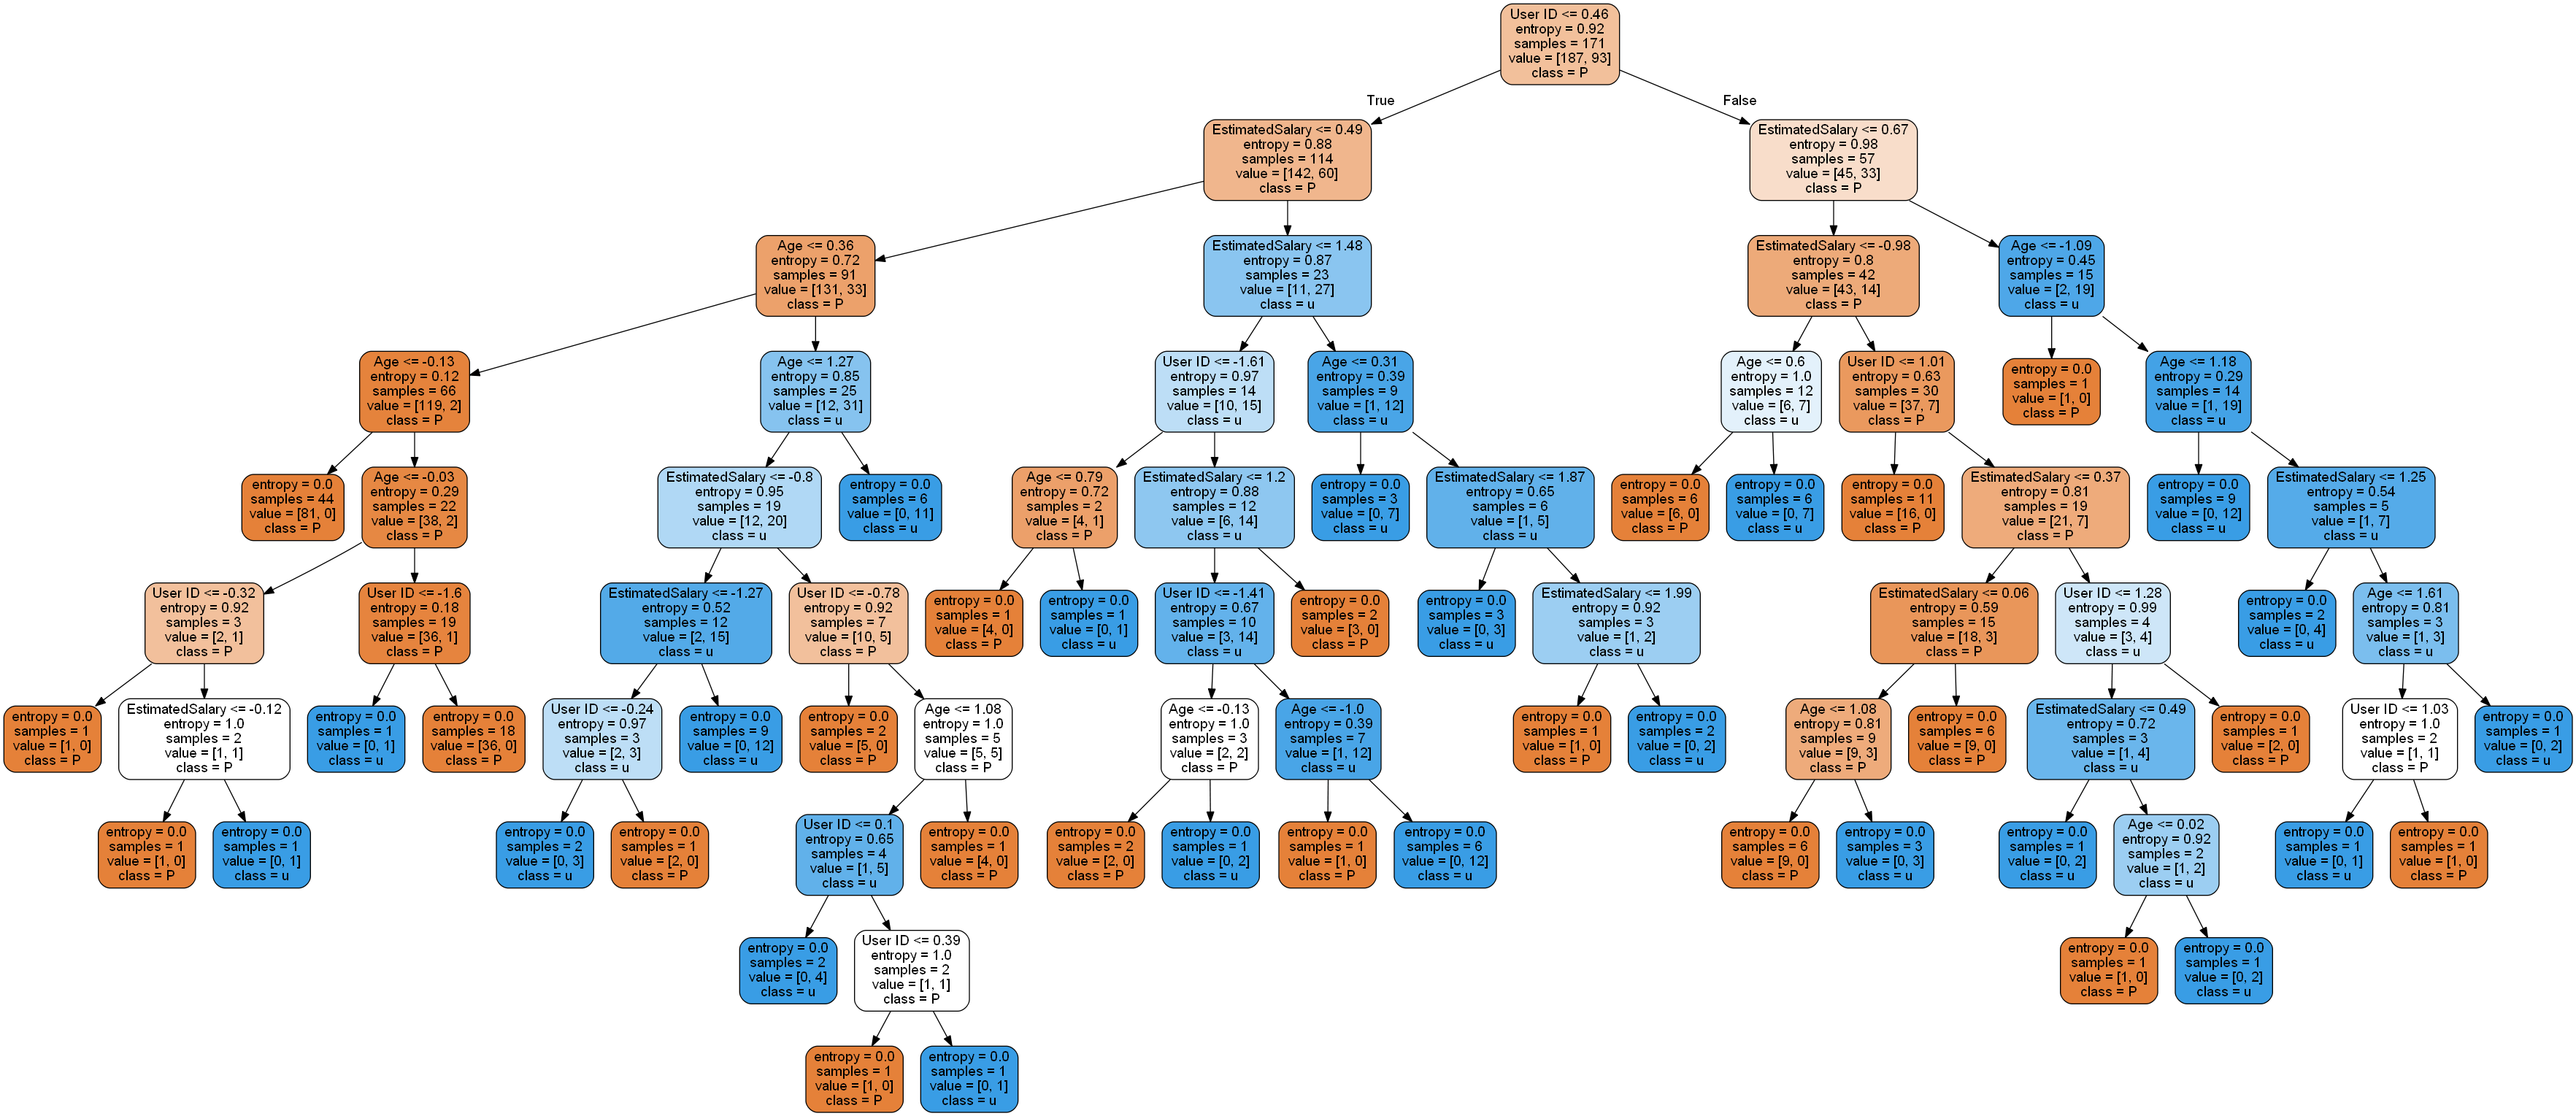

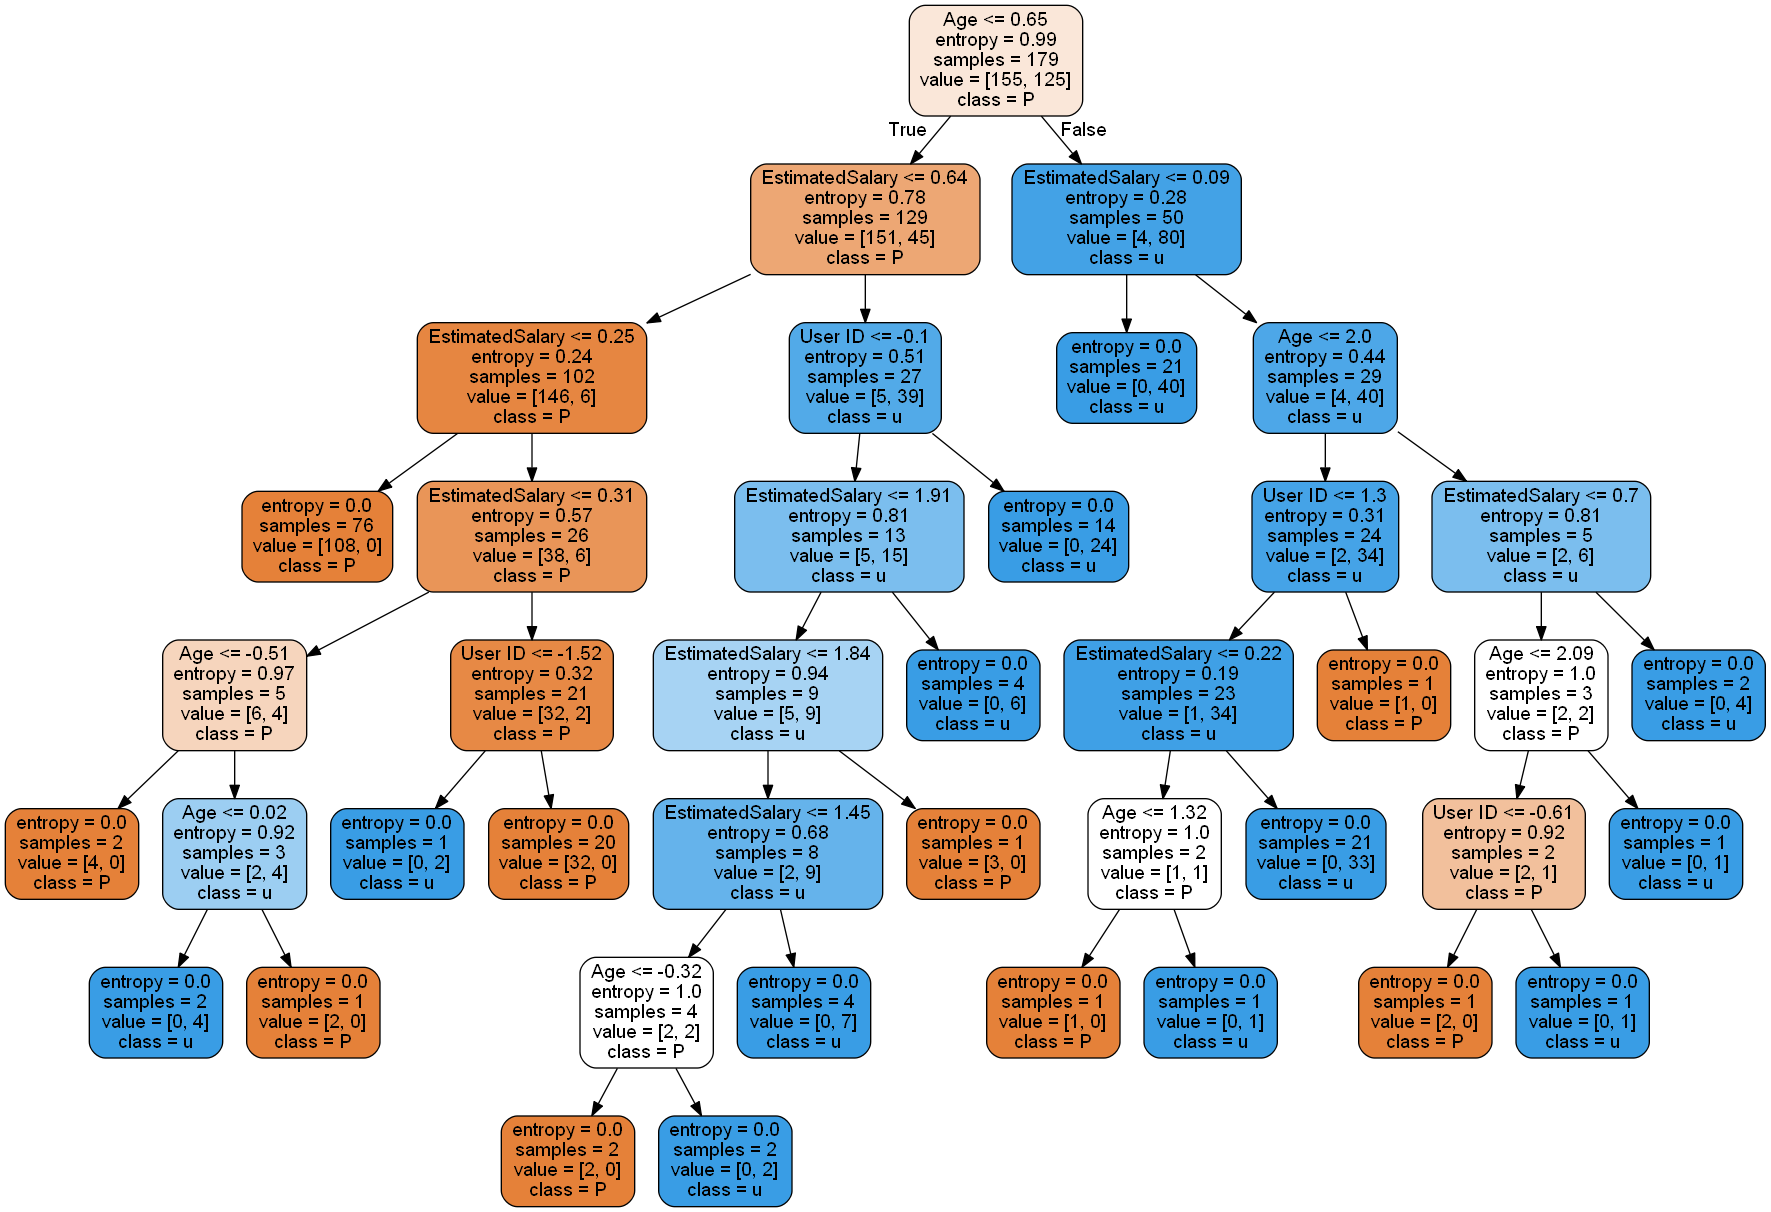

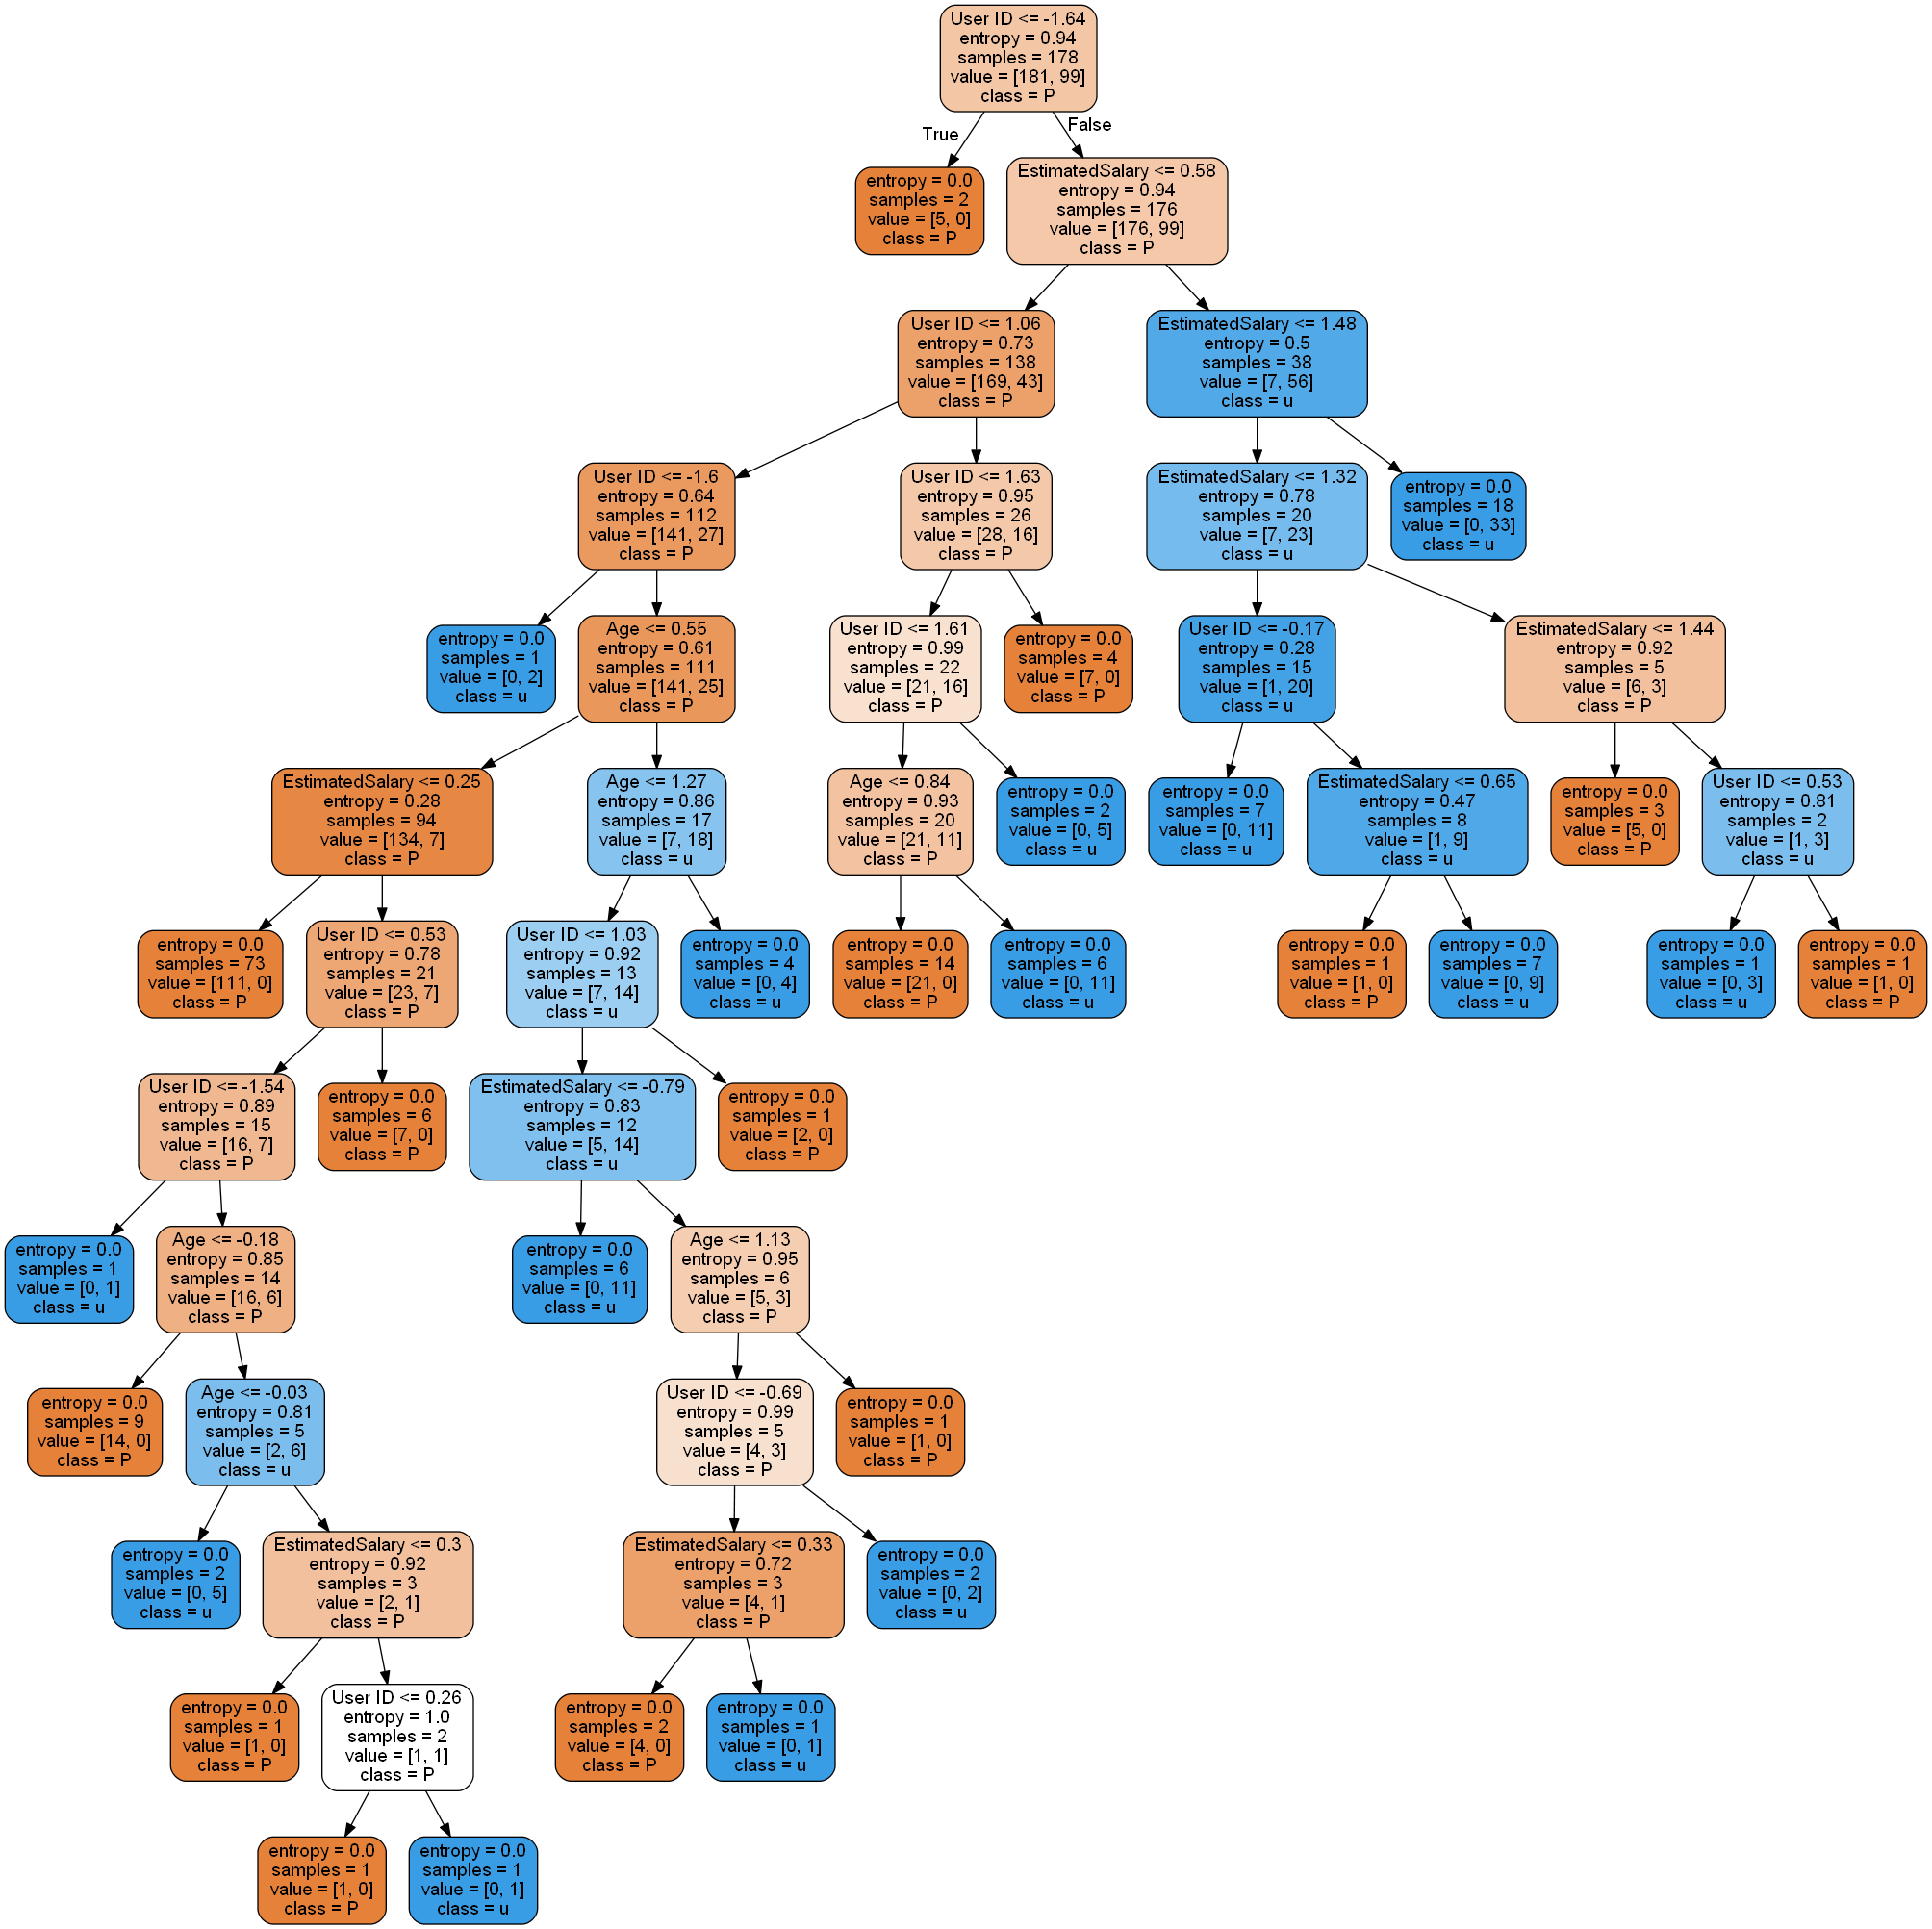

In [111]:
for im in images:
    display(Image(filename=im.filename, retina=True))